In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from scipy import stats

In [7]:
def trim_data(xdata,ydata):
    
    npoints = len(xdata)

    values = np.vstack([xdata,ydata])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(values).T,xdata.shape)
    
    sort = [i for i in Z]
    sort.sort()
    cut = sort[int(0.1*npoints)]
    
    xcut = []
    ycut = []
    for i in range(npoints):
        if Z[i] >= cut:
            xcut.append(xdata[i])
            ycut.append(ydata[i])
    
    return np.array(xcut),np.array(ycut),cut

In [11]:
# This function plots the contours given the data and the cut from the kde
def contours(X, Y, cut, ax, x_bw=False, y_bw=False, gridsize=200):

    # default bandwidths
    if x_bw == False:
        x_bw = np.std(X)/3
    if y_bw == False:
        y_bw = np.std(Y)/2

    # filled contour
    sns.kdeplot(X,Y,n_levels=[0,cut,1],shade=True,shade_lowest=False,cmap=GRAY,
                                        bw=[x_bw,y_bw],gridsize=gridsize,ax=ax)
    # contour outline
    cs = sns.kdeplot(X,Y,n_levels=[0,cut,1],cmap=BLACK,bw=[x_bw,y_bw],
                                                        gridsize=gridsize,ax=ax)
    # axis labels
    ax.set_xlabel('1n events',horizontalalignment='right',x=1.0)
    ax.set_ylabel('2n events',horizontalalignment='right', y=1.0)
    
    return cs

In [9]:
# Define colors for the contours below
GRAY = sns.light_palette('lightgray',n_colors=1,as_cmap=True)
BLACK = sns.dark_palette('black',n_colors=1,as_cmap=True)

In [3]:
# where the unfolded data lives
unfolded_location = '../unfolded_data/'

In [4]:
# Data for HALO 1, 5kpc, 72v48
h1_5kpc_72v48_1n, h1_5kpc_72v48_2n = np.load(unfolded_location+'halo1_5kpc_72v48_unfolded_matrix.npy')

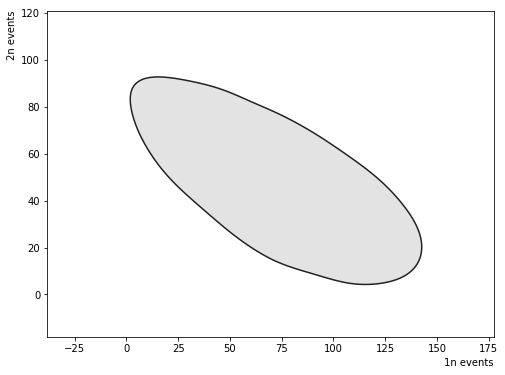

In [12]:
# HALO 1, 5kpc, 72vs48
xM1_1,yM1_1,cutM1_1 = trim_data(h1_5kpc_72v48_1n,h1_5kpc_72v48_2n)
fig,ax = plt.subplots(1,1,figsize=(8,6))
cs = contours(xM1_1,yM1_1,cutM1_1,ax)

6938.485775368365


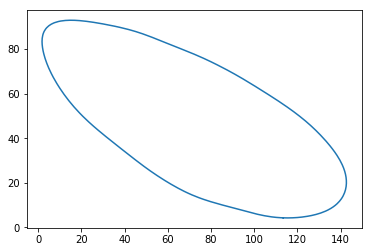

In [34]:
# get the vertices
p = cs.collections[1].get_paths()[0]
x = p.vertices[:,0]
y = p.vertices[:,1]
# area with Green's theorem
area=0.5*np.sum(y[:-1]*np.diff(x) - x[:-1]*np.diff(y))
area=np.abs(area)
print(area)

# plot the contour as proof
plt.plot(x,y)
plt.show()